<br>
<br>

## 1. Dense network

<br>
<br>

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4957 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3738 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8902


In [4]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8742
Test loss: 0.3455561399459839, Test accuracy: 87.41999864578247


Your **accuracy** is probably about **89% on training** and **87% on validation**. 
<br> You can make that even better using convolutions, which narrows down the content of the image to focus on specific, distinct details.

<br> 

If you've ever done image processing using a filter, then convolutions will look very familiar.

<br> 

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. 
<br> By changing the underlying pixels based on the formula within that matrix, you can perform operations like edge detection. 
<br> For example, typically a **3x3** is defined for **edge detection** where **the middle cell is 8, and all of its neighbors are -1**. 
<br> In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. 
<br> Do this for every pixel, and you'll end up with **a new image that has its edges enhanced**.

<br> 

This is perfect for computer vision, because enhancing features like edges **helps the computer distinguish one item from another**. 
<br> Better still, **the amount of information needed is much less**, because you'll train only on the highlighted features.

<br> 

That's the concept of Convolutional Neural Networks. 
<br> Add some layers to do convolution before you have the dense layers, 
<br> and then **the information going to the dense layers** becomes **more focused and possibly more accurate**.

<br>
<br>

## 2. Convolutional network

<br>
<br>

In [9]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1) / 255.0
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0

Instead of the input layer at the top, you're going to add a **convolutional layer**. 

<br>

The parameters are:
- **The number of convolutions** you want to generate. A value like 32 is a good starting point. <- # of filters(kernels)
- **The size of the convolutional matrix**, in this case a 3x3 grid.
- The activation function to use, in this case use relu.
- In the first layer, the shape of the input data.

<br> 

You'll follow the convolution with a **max pooling** layer, 
<br>which is designed to compress the image while **maintaining the content of the features that were highlighted by the convolution**. 

<br>By specifying (2,2) for the max pooling, 
<br>the effect is to reduce the size of the image by a factor of 4. 
<br>It creates a 2x2 array of pixels and picks the largest pixel value, turning 4 pixels into 1. 
<br>It repeats this computation across the image, and in so doing halves the number of horizontal pixels and halves the number of vertical pixels.

<br>

You can call **model.summary()** to see the **size** and **shape** of the network. 
<br>Notice that after every max pooling layer, the image size is reduced.

In [10]:
model = tf.keras.models.Sequential([
    
  # tf.keras.layers.Conv2D(필터 수(-> 피쳐 맵 수), 필터의 크기(가로 & 세로),  ~~~)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Now flatten the output. After this you'll just have the same DNN structure as the non-convolutional version
    tf.keras.layers.Flatten(),
    
    # The same 128-dense-layers, and 10-output-layers as in the pre-convolution example.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4316 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2870 - accuracy: 0.8953
Epoch 3/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2429 - accuracy: 0.9094
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2122 - accuracy: 0.9206
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1864 - accuracy: 0.9291


In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 5s 14ms/step - loss: 0.2564 - accuracy: 0.9048
Test loss: 0.2564435601234436, Test accuracy: 90.47999978065491


It's likely gone up to about **93% on the training data** and **91% on the validation data**.

<br>

Now try running it for more epochs—say about 20—and explore the results. 
<br>While the training results might seem really good, 
<br>the validation results may actually go down due to a phenomenon called overfitting.

<br>

Overfitting occurs when the network learns the data from the training set too well, 
<br>so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations. 
<br>For example, if you trained only on heels, then the network might be very good at identifying heels, but sneakers might confuse it.

<br>
Look at the code again, and see step-by-step how the convolutions were built.

<br>
<br>

## + Visualize the result

<br>
<br>

In [15]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


<br>

Now you can select some of the corresponding images for those labels and render **what they look like going through the convolutions**. 

<br>

So, in the following code, 
<br>FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value 9, an ankle boot.

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) 

In [17]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928

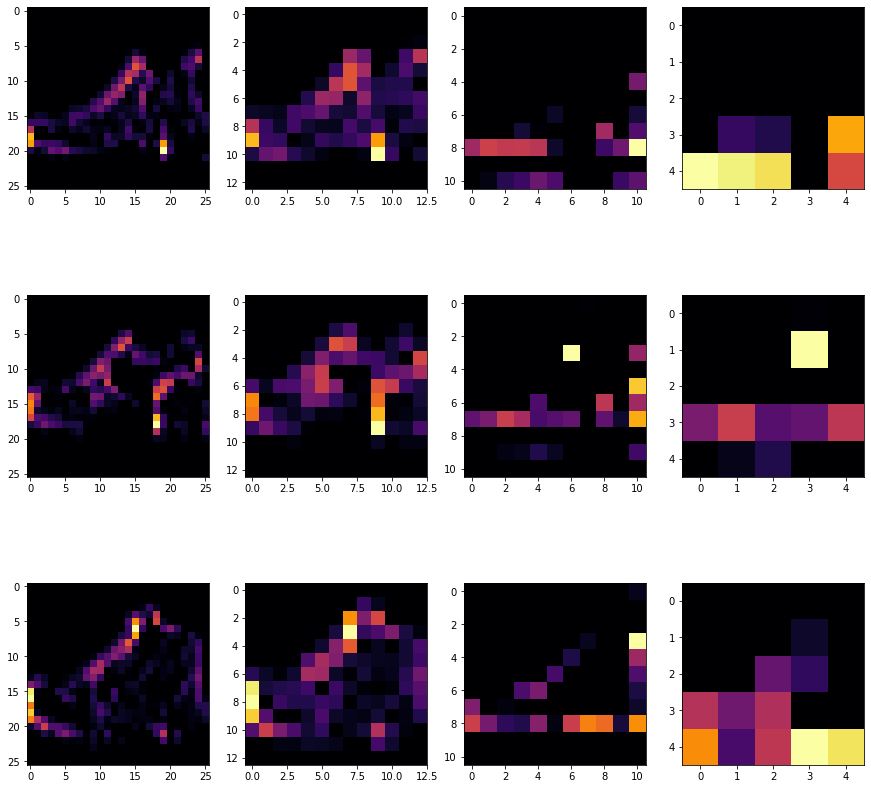

In [12]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6

_, ax = plt.subplots(3, 4, figsize=(15, 15))

for x in range(0,4):
    
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[0, x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[0, x].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[1, x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[1, x].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    ax[2, x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    ax[2, x].grid(False)
    
plt.show()


# And you should see something like the following, 
# where the convolution is taking the essence of the sole of the shoe, 
# effectively spotting that as a common feature across all shoes.